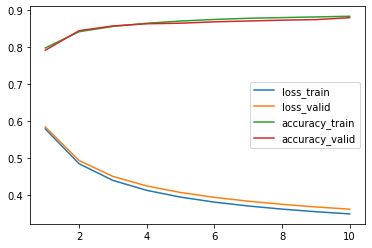

In [29]:
from torch import nn,optim
from torch.utils.data import TensorDataset,DataLoader
import pickle
import torch

class neural_net(nn.Module):
    def __init__(self,inp,out):
        super().__init__()
        self.fc=nn.Linear(inp,out,bias=False)
        nn.init.xavier_normal_(self.fc.weight)
    
    def forward(self,x):
        x=self.fc(x)
        return x

def accuracy(pred,label):
    pred=torch.argmax(pred,dim=-1)
    leng=len(pred)
    return (pred==label).sum().item()/leng
    
model=neural_net(300,4)

dataset_train=TensorDataset(X_train,Y_train)
dl_train=DataLoader(dataset_train)

ave_loss=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

import matplotlib.pyplot as plt
epoch=10
epo=[]
loss_train=[]
acc_train=[]
loss_valid=[]
acc_valid=[]
for num in range(epoch):
    epo.append(num+1)
    for X,Y in dl_train:
        optimizer.zero_grad()
        pred=model(X)
        loss=ave_loss(pred,Y)
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        loss_train.append(ave_loss(model(X_train),Y_train))
        acc_train.append(accuracy(model(X_train),Y_train))
        
        loss_valid.append(ave_loss(model(X_valid),Y_valid))
        acc_valid.append(accuracy(model(X_valid),Y_valid))
plt.plot(epo,loss_train,label="loss_train")
plt.plot(epo,loss_valid,label="loss_valid")

plt.plot(epo,acc_train,label="accuracy_train")
plt.plot(epo,acc_valid,label="accuracy_valid")
plt.legend()